In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Air_Quality_20240104.csv')

In [4]:
df

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30,NaN
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93,NaN
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,01/01/2015,19.09,NaN
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,01/01/2015,19.76,NaN
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/01/2008,22.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16213,130750,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,µg/m3,UHF42,211,Williamsburg - Bushwick,2005,01/01/2005,3.10,NaN
16214,130780,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,µg/m3,Borough,5,Staten Island,2005,01/01/2005,2.30,NaN
16215,131020,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",UHF42,504,South Beach - Tottenville,2005-2007,01/01/2005,7.50,NaN
16216,131026,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",Borough,5,Staten Island,2005-2007,01/01/2005,7.80,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16218 entries, 0 to 16217
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       16218 non-null  int64  
 1   Indicator ID    16218 non-null  int64  
 2   Name            16218 non-null  object 
 3   Measure         16218 non-null  object 
 4   Measure Info    16218 non-null  object 
 5   Geo Type Name   16218 non-null  object 
 6   Geo Join ID     16218 non-null  int64  
 7   Geo Place Name  16218 non-null  object 
 8   Time Period     16218 non-null  object 
 9   Start_Date      16218 non-null  object 
 10  Data Value      16218 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.5+ MB


Las dos categorías más frecuentes en el conjunto de datos son "Nitrogen dioxide (NO2)" y "Fine particles (PM 2.5)", ambas con aproximadamente el 33.91% de las observaciones cada una. 

"Nitrogen dioxide (NO2)" y "Fine particles (PM 2.5)" son contaminantes comunes del aire que a menudo se asocian con la calidad del aire en entornos urbanos.

Las categorías relacionadas con problemas de salud, como "Asthma emergency department visits due to PM2.5" y "Asthma hospitalizations due to Ozone", también están presentes en el conjunto de datos.

Hay categorías relacionadas con las emisiones vehiculares, como "Annual vehicle miles travelled (cars)" y "Annual vehicle miles travelled (trucks)", que representan una parte significativa de las observaciones.

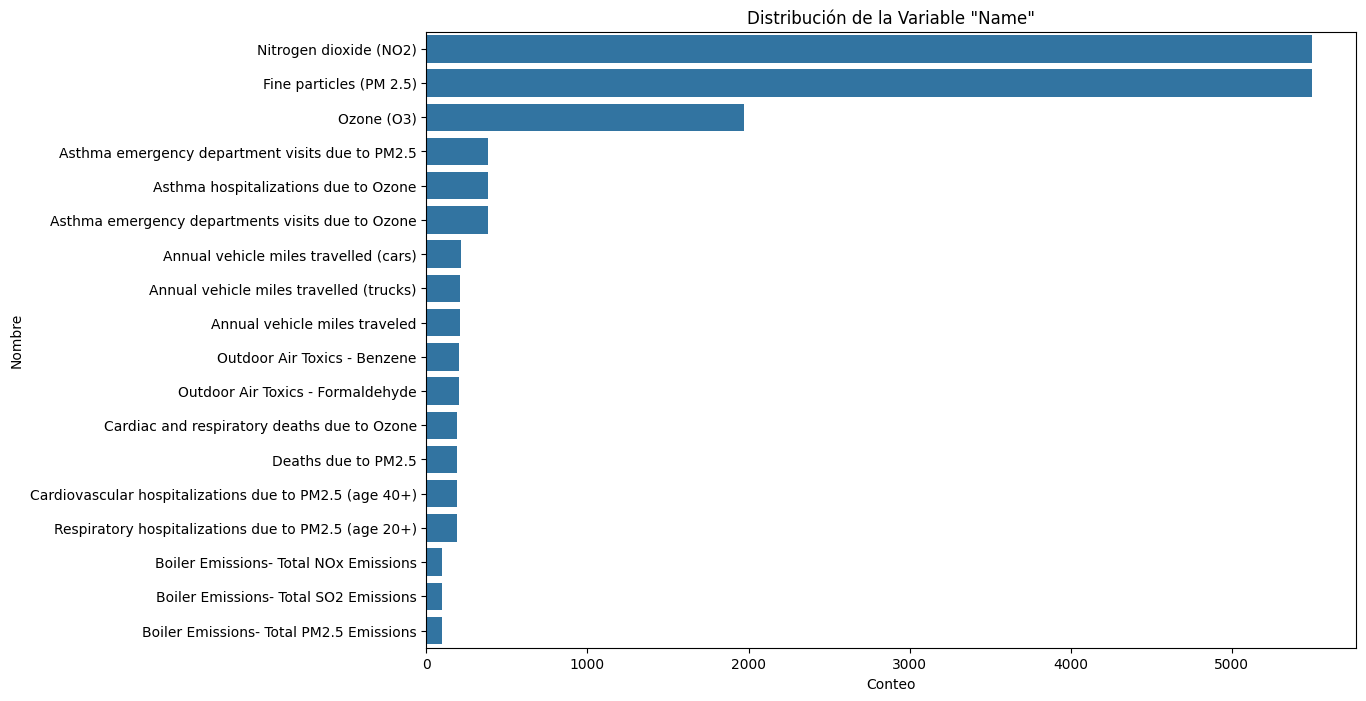

In [12]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Name', data=df, order=df['Name'].value_counts().index)
plt.title('Distribución de la Variable "Name"')
plt.xlabel('Conteo')
plt.ylabel('Nombre')
plt.show()

In [14]:
# Calcular el porcentaje de cada categoría en la variable "Name"
category_percentage = df['Name'].value_counts(normalize=True) * 100

# Crear un DataFrame con la información
category_df = pd.DataFrame({'Categoría': category_percentage.index, 'Porcentaje': category_percentage.values})
category_df

,Categoría,Porcentaje
0,Nitrogen dioxide (NO2),33.906770
1,Fine particles (PM 2.5),33.906770
2,Ozone (O3),12.171661
3,Asthma emergency department visits due to PM2.5,2.367740
4,Asthma hospitalizations due to Ozone,2.367740
5,Asthma emergency departments visits due to Ozone,2.367740
6,Annual vehicle miles travelled (cars),1.319522
7,Annual vehicle miles travelled (trucks),1.288692
8,Annual vehicle miles traveled,1.288692
9,Outdoor Air Toxics - Benzene,1.251696


In [6]:
# Mostrar las categorías únicas y su frecuencia
measure_counts = df['Measure'].value_counts()

# Calcular el porcentaje de cada categoría
measure_percentages = (measure_counts / len(df)) * 100

# Crear un DataFrame para visualizar los resultados
measure_summary = pd.DataFrame({'Measure': measure_counts.index, 'Count': measure_counts.values, 'Percentage': measure_percentages.values})

measure_summary

,Measure,Count,Percentage
0,Mean,12972,79.985202
1,million miles,632,3.896905
2,Estimated annual rate (under age 18),576,3.551609
3,Estimated annual rate (age 18+),576,3.551609
4,Estimated annual rate,576,3.551609
5,Annual average concentration,406,2.503391
6,Number per km2,288,1.775805
7,Estimated annual rate (age 30+),192,1.183870


Categoría "ppb" (parts per billion):

Número de Ocurrencias: 7,473 (46.08%)
Porcentaje: Esta categoría es la más predominante, abarcando aproximadamente el 46.08% de los datos. Indica medidas en partes por mil millones.
Categoría "mcg/m3" (micrograms per cubic meter):

Número de Ocurrencias: 5,499 (33.91%)
Porcentaje: Esta categoría representa aproximadamente el 33.91% de los datos. Indica medidas en microgramos por metro cúbico.
Categoría "per 100,000 adults":

Número de Ocurrencias: 1,152 (7.10%)
Porcentaje: Esta categoría representa aproximadamente el 7.10%. Sugiere tasas por cada 100,000 adultos.
Categorías "per km2" y "per 100,000 children":

"per km2": 632 (3.90%)
"per 100,000 children": 576 (3.55%)
Porcentaje: Estas dos categorías juntas representan aproximadamente el 7.45%. Indican tasas por kilómetro cuadrado y por cada 100,000 niños, respectivamente.
Categoría "µg/m3" (micrograms per cubic meter):

Número de Ocurrencias: 406 (2.50%)
Porcentaje: Representa aproximadamente el 2.50%. Indica medidas en microgramos por metro cúbico.
Categoría "number":

Número de Ocurrencias: 288 (1.78%)
Porcentaje: Representa aproximadamente el 1.78%. Indica un número directo.
Categoría "per 100,000":

Número de Ocurrencias: 192 (1.18%)
Porcentaje: Representa aproximadamente el 1.18%. Indica tasas por cada 100,000.

In [8]:
measure_info_counts = df['Measure Info'].value_counts()

# Calcular el porcentaje de cada categoría
measure_info_percentages = (measure_info_counts / len(df)) * 100

# Crear un DataFrame para visualizar los resultados
measure_info_summary = pd.DataFrame({'Measure Info': measure_info_counts.index, 'Count': measure_info_counts.values, 'Percentage': measure_info_percentages.values})
measure_info_summary

,Measure Info,Count,Percentage
0,ppb,7473,46.078431
1,mcg/m3,5499,33.906770
2,"per 100,000 adults",1152,7.103219
3,per km2,632,3.896905
4,"per 100,000 children",576,3.551609
5,µg/m3,406,2.503391
6,number,288,1.775805
7,"per 100,000",192,1.183870


Categoría "UHF42" (Neighborhood (UHF 42)):

Número de Ocurrencias: 6,300 (38.85%)
Porcentaje: Esta categoría es la más predominante, abarcando aproximadamente el 38.85% de los datos. Indica datos a nivel de vecindario (UHF 42).
Categoría "CD" (Community District):

Número de Ocurrencias: 5,900 (36.38%)
Porcentaje: Esta categoría representa aproximadamente el 36.38% de los datos. Indica datos a nivel de distrito comunitario.
Categoría "UHF34" (Neighborhood (UHF 34)):

Número de Ocurrencias: 3,128 (19.29%)
Porcentaje: Esta categoría representa aproximadamente el 19.29%. Indica datos a nivel de vecindario (UHF 34).
Categoría "Borough":

Número de Ocurrencias: 740 (4.56%)
Porcentaje: Representa aproximadamente el 4.56%. Indica datos a nivel de condado (borough).
Categoría "Citywide":

Número de Ocurrencias: 150 (0.92%)
Porcentaje: Representa aproximadamente el 0.92%. Indica datos a nivel de toda la ciudad.

In [10]:
geo_type_counts = df['Geo Type Name'].value_counts()

# Calcular el porcentaje de cada categoría
geo_type_percentages = (geo_type_counts / len(df)) * 100

# Crear un DataFrame para visualizar los resultados
geo_type_summary = pd.DataFrame({'Geo Type Name': geo_type_counts.index, 'Count': geo_type_counts.values, 'Percentage': geo_type_percentages.values})
geo_type_summary

,Geo Type Name,Count,Percentage
0,UHF42,6300,38.845727
1,CD,5900,36.379332
2,UHF34,3128,19.287212
3,Borough,740,4.562831
4,Citywide,150,0.924898


Diversidad de Vecindarios:

Hay 114 vecindarios únicos en el conjunto de datos.
Distribución de Vecindarios:

La mayoría de los vecindarios tienen una frecuencia de 242, representando aproximadamente el 1.49% cada uno. Esto sugiere que muchos vecindarios tienen una distribución uniforme en el conjunto de datos.
Vecindarios más Frecuentes:

Algunos ejemplos de vecindarios más frecuentes incluyen "Bedford Stuyvesant - Crown Heights," "West Queens," "Flushing - Clearview," "Upper West Side," y "Jamaica."
Vecindarios Menos Frecuentes:

Algunos vecindarios tienen una frecuencia de 92, representando aproximadamente el 0.57% cada uno. Estos son menos frecuentes en comparación con los mencionados anteriormente.

In [11]:
geo_place_name_counts = df['Geo Place Name'].value_counts()

# Calcular el porcentaje de cada categoría
geo_place_name_percentages = (geo_place_name_counts / len(df)) * 100

# Crear un DataFrame para visualizar los resultados
geo_place_name_summary = pd.DataFrame({'Geo Place Name': geo_place_name_counts.index, 'Count': geo_place_name_counts.values, 'Percentage': geo_place_name_percentages.values})

geo_place_name_summary

,Geo Place Name,Count,Percentage
0,Bedford Stuyvesant - Crown Heights,242,1.492169
1,West Queens,242,1.492169
2,Flushing - Clearview,242,1.492169
3,Upper West Side,242,1.492169
4,Jamaica,242,1.492169
...,...,...,...
109,Bayside Little Neck-Fresh Meadows,92,0.567271
110,Northern SI,92,0.567271
111,Upper East Side-Gramercy,92,0.567271
112,Union Square-Lower Manhattan,92,0.567271


In [12]:
df['Start_Date'] = pd.to_datetime(df['Start_Date'], format='%m/%d/%Y')

# Extraer el año de la fecha y contar su frecuencia
year_distribution = df['Start_Date'].dt.year.value_counts().sort_index()

# Crear un DataFrame para visualizar los resultados
year_summary = pd.DataFrame({'Year': year_distribution.index, 'Count': year_distribution.values})

print(year_summary)

    Year  Count
0   2005    887
1   2008    564
2   2009   1608
3   2010    987
4   2011   1201
5   2012   1467
6   2013   1131
7   2014    801
8   2015   1893
9   2016   1026
10  2017    987
11  2018    987
12  2019    987
13  2020    987
14  2021    705


Vamos a seleccionar las columnas relevantes para nuestro estudio

In [13]:
categorias_vehiculos = [
    'Annual vehicle miles travelled (cars)',
    'Annual vehicle miles travelled (trucks)',
    'Annual vehicle miles traveled'
]

# Filtrar el DataFrame
df_vehiculos = df[df['Name'].isin(categorias_vehiculos)]

# Mostrar una muestra del DataFrame resultante
df_vehiculos

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
1126,325209,643,Annual vehicle miles traveled,million miles,per km2,UHF42,205,Sunset Park,2016,2016-01-01,26.1,NaN
1127,151625,643,Annual vehicle miles traveled,million miles,per km2,UHF42,103,Fordham - Bronx Pk,2005,2005-01-01,23.8,NaN
1128,325202,643,Annual vehicle miles traveled,million miles,per km2,UHF42,105,Crotona -Tremont,2016,2016-01-01,36.4,NaN
1129,325244,643,Annual vehicle miles traveled,million miles,per km2,CD,104,Clinton and Chelsea (CD4),2016,2016-01-01,53.5,NaN
1130,154577,643,Annual vehicle miles traveled,million miles,per km2,CD,206,Belmont and East Tremont (CD6),2005,2005-01-01,37.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
15675,325182,645,Annual vehicle miles travelled (trucks),million miles,per km2,CD,407,Flushing and Whitestone (CD7),2016,2016-01-01,1.1,NaN
15928,325101,645,Annual vehicle miles travelled (trucks),million miles,per km2,UHF42,204,East New York,2016,2016-01-01,0.8,NaN
16200,325197,643,Annual vehicle miles traveled,million miles,per km2,Borough,5,Staten Island,2016,2016-01-01,9.7,NaN
16201,151626,643,Annual vehicle miles traveled,million miles,per km2,UHF42,104,Pelham - Throgs Neck,2005,2005-01-01,22.8,NaN


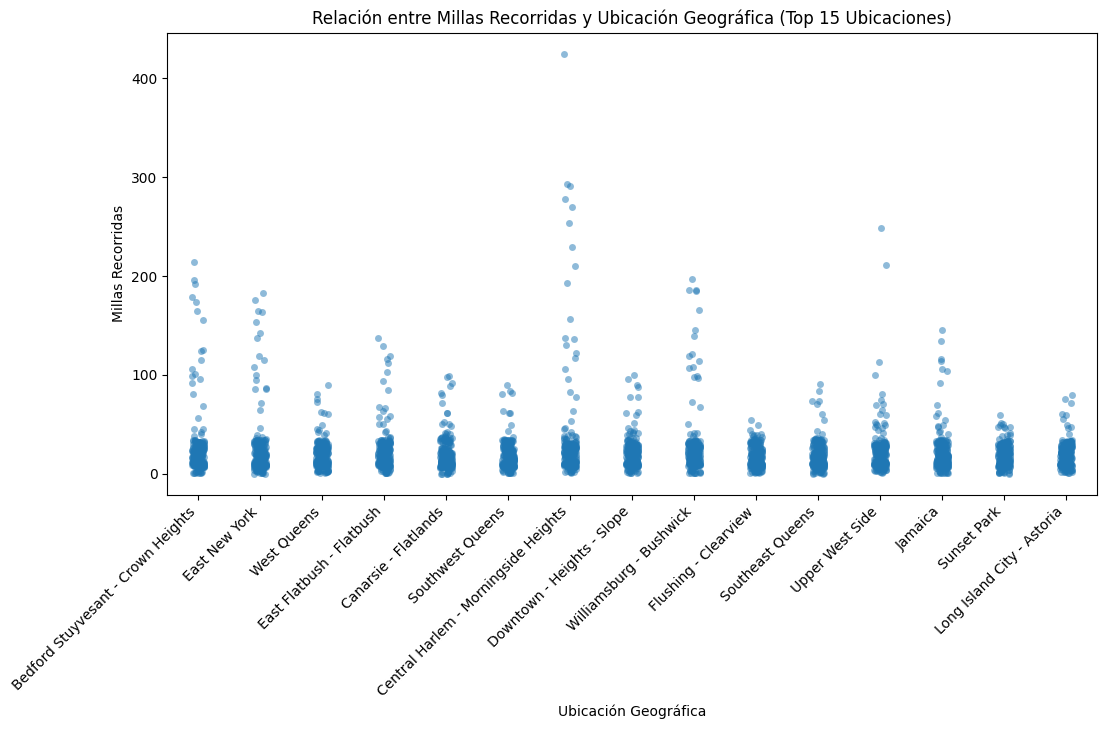

In [14]:
# Obtener las 15 ubicaciones geográficas más frecuentes
top_ubicaciones = df['Geo Place Name'].value_counts().head(15).index

# Filtrar el DataFrame para incluir solo las filas correspondientes a las top 15 ubicaciones
df_top_ubicaciones = df[df['Geo Place Name'].isin(top_ubicaciones)]

# Crear un diagrama de dispersión por millas recorridas y ubicación geográfica
plt.figure(figsize=(12, 6))
sns.stripplot(x='Geo Place Name', y='Data Value', data=df_top_ubicaciones, jitter=True, alpha=0.5)
plt.title('Relación entre Millas Recorridas y Ubicación Geográfica (Top 15 Ubicaciones)')
plt.xlabel('Ubicación Geográfica')
plt.ylabel('Millas Recorridas')
plt.xticks(rotation=45, ha='right')
plt.show()

El promedio indica el valor medio de las millas recorridas en cada ubicación geográfica. Por ejemplo, en "Central Harlem - Morningside Heights," el promedio es de aproximadamente 32.11 millones de millas, mientras que en "Southeast Queens" es de aproximadamente 17.13 millones de millas.



podríamos inferir que, en promedio, los viajes en la zona de "Central Harlem - Morningside Heights" tienden a ser más largos en comparación con otras áreas.

In [15]:
# Obtener las 15 ubicaciones geográficas más frecuentes
top_ubicaciones = df['Geo Place Name'].value_counts().head(15).index

# Filtrar el DataFrame para incluir solo las filas correspondientes a las top 15 ubicaciones
df_top_ubicaciones = df[df['Geo Place Name'].isin(top_ubicaciones)]

# Calcular estadísticas resumidas para millas recorridas por ubicación geográfica
resumen_millas_por_ubicacion = df_top_ubicaciones.groupby('Geo Place Name')['Data Value'].describe()

# Mostrar la tabla de estadísticas resumidas
resumen_millas_por_ubicacion

,count,mean,std,min,25%,50%,75%,max
Geo Place Name,,,,,,,,
Bedford Stuyvesant - Crown Heights,242.0,25.846405,33.479679,0.10,9.1400,17.405,28.5400,213.9
Canarsie - Flatlands,242.0,18.365579,16.569125,0.00,8.1800,12.430,22.8350,98.8
Central Harlem - Morningside Heights,242.0,32.109339,53.586514,0.90,9.9900,19.540,28.4900,424.7
Downtown - Heights - Slope,242.0,20.589545,15.549107,0.10,9.8925,17.990,27.8425,99.3
East Flatbush - Flatbush,242.0,21.156901,20.902678,0.20,8.8400,16.170,26.2575,137.4
East New York,242.0,23.765909,29.835277,0.00,9.0400,15.775,26.0850,182.4
Flushing - Clearview,242.0,16.287727,10.173557,0.40,8.4625,13.555,22.6600,54.5
Jamaica,242.0,19.940000,20.303650,0.10,8.4600,14.315,23.9400,144.7
Long Island City - Astoria,242.0,18.847273,12.355540,0.70,9.7500,16.785,26.2900,79.4


 El NO2 es un gas contaminante del aire que se genera principalmente por la combustión de combustibles, como la gasolina en motores de vehículos y la quema de carbón en instalaciones industriales. Por lo tanto, las concentraciones de NO2 en el aire pueden estar asociadas a la actividad vehicular.

Así como en el analisis de millas recorridas por ubicación geográfica, vemos que Harlem presenta más contaminación por NO2.

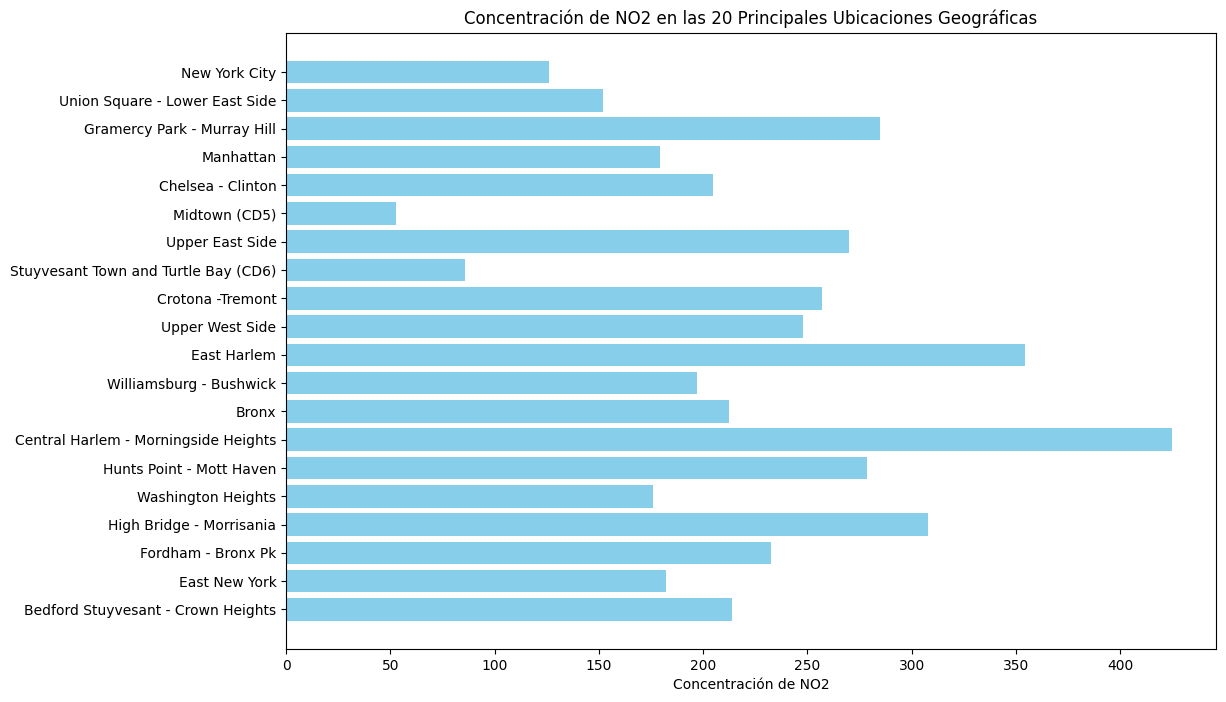

In [17]:
top_20_locations = df.groupby('Geo Place Name')['Data Value'].mean().sort_values(ascending=False).head(20).index

# Filtrar el DataFrame original
df_top_20 = df[df['Geo Place Name'].isin(top_20_locations)]

# Visualizar los datos
plt.figure(figsize=(12, 8))
plt.barh(df_top_20['Geo Place Name'], df_top_20['Data Value'], color='skyblue')
plt.xlabel('Concentración de NO2')
plt.title('Concentración de NO2 en las 20 Principales Ubicaciones Geográficas')
plt.show()

El año 2008 fue el año con mas concentracion de NO2, progresivamente  hasta la fecha ha venido en detrimento.

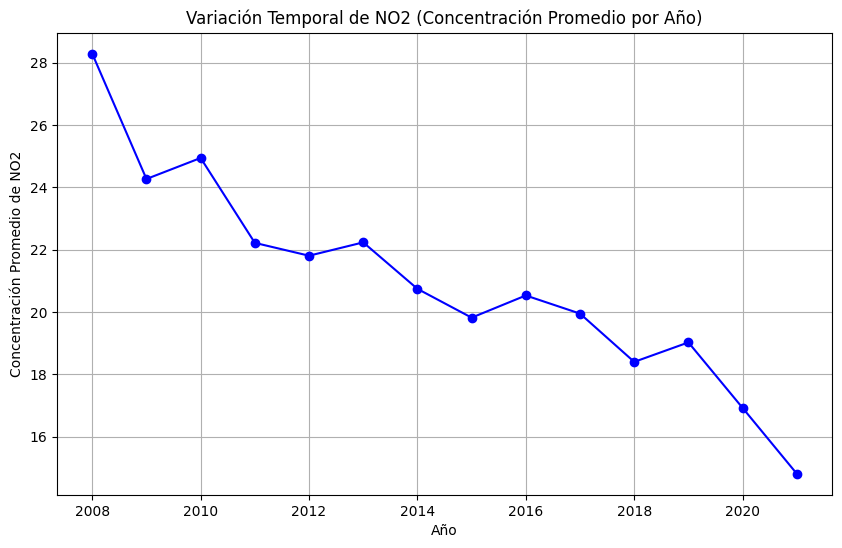

In [21]:
# Convertir la columna 'Start_Date' a tipo datetime
df['Start_Date'] = pd.to_datetime(df['Start_Date'], format='%m/%d/%Y')

# Extraer el año de la fecha y crear una nueva columna 'Year'
df['Year'] = df['Start_Date'].dt.year

# Filtrar las filas relacionadas con NO2
df_no2 = df[df['Name'] == 'Nitrogen dioxide (NO2)']

# Calcular la concentración promedio de NO2 para cada año
average_no2_by_year = df_no2.groupby('Year')['Data Value'].mean()

# Graficar la variación temporal de NO2
plt.figure(figsize=(10, 6))
plt.plot(average_no2_by_year.index, average_no2_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Variación Temporal de NO2 (Concentración Promedio por Año)')
plt.xlabel('Año')
plt.ylabel('Concentración Promedio de NO2')
plt.grid(True)
plt.show()